In [ ]:
%%capture
!pip install idx2numpy

In [ ]:
import tensorflow
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns
import math
import idx2numpy                        #library to convert UBYTE file -> numpy arrays
%matplotlib inline

Q2 OVO and OVR

In [ ]:
# !wget https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/t10k-images-idx3-ubyte.gz
# !wget https://github.com/zalandoresearch/fashion-mnist/blob/master/data/fashion/t10k-labels-idx1-ubyte.gz
# !git clone git@github.com:zalandoresearch/fashion-mnist.git

In [ ]:
import os
os.chdir('/content/drive/MyDrive/ML_dataset')

In [ ]:
file1 = 'train-images-idx3-ubyte'       #training set images
file2 = 'train-labels-idx1-ubyte'       #training set labels
file3 = 't10k-images-idx3-ubyte'        #test set images
file4 = 't10k-labels-idx1-ubyte'        #test set labels

train_data   = idx2numpy.convert_from_file(file1)   # train_data is a 3D numpy array of shape 60000, 28, 28
train_label  = idx2numpy.convert_from_file(file2)   # train_data is a np.ndarray type of object of shape 60000, 28, 28
test_data    = idx2numpy.convert_from_file(file3)
test_label   = idx2numpy.convert_from_file(file4)

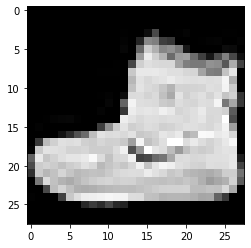

In [ ]:
plt.imshow(train_data[0], cmap='gray')

EDA

In [ ]:
print("Shape of training data: ", train_data.shape)
print("Shape of training label: ", train_label.shape)
print("Shape of testing data: ", test_data.shape)
print("Shape of testing label: ", test_label.shape)

Shape of training data:  (60000, 28, 28)
Shape of training label:  (60000,)
Shape of testing data:  (10000, 28, 28)
Shape of testing label:  (10000,)


In [ ]:
print("There are", len(np.unique(train_label)), "unique classes")
print("Classes are: ", [i for i in np.unique(train_label)])

There are 10 unique classes
Classes are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
len(np.where(train_label==0)[0])

6000

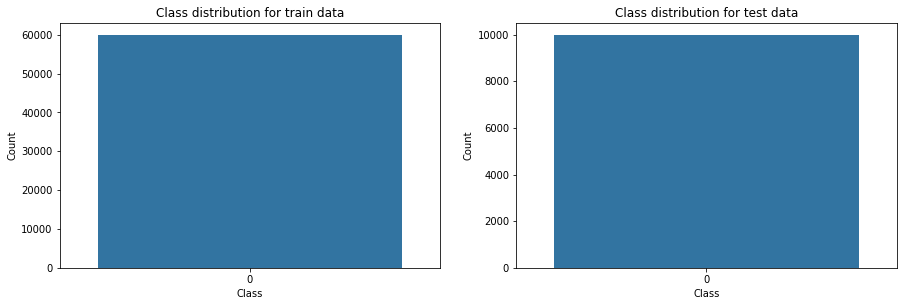

In [ ]:
plt.figure(figsize=(15, 4.5))
plt.subplot(1, 2, 1)
sns.countplot(train_label).set_title('Class distribution for train data')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(test_label).set_title('Class distribution for test data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
X_train = train_data.reshape((60000, 784))
y_train = train_label
X_test = test_data.reshape((10000, 784))
y_test = test_label

In [ ]:
kk = ['pixel' for i in range(784)]
ky = np.arange(0, 784)
df_FMNIST = pd.DataFrame(X_train, columns = [kk[i] + ' ' + str(ky[i]) for i in range(784)])

In [ ]:
X_train_pdf = df_FMNIST

In [ ]:
df_FMNIST['label'] = y_train
df_FMNIST.head()

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
1,0,0,0,0,0,1,0,0,0,0,...,114,130,76,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,22,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,33,96,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y_train_pdf = df_FMNIST['label']

In [ ]:
X_train_pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, pixel 0 to label
dtypes: uint8(785)
memory usage: 44.9 MB


In [ ]:
pix = []
for i in range(max(X_train[0])):
    pix.append(len(np.where(X_train == i)[0]))

Text(0.5, 0, 'Pixel value')

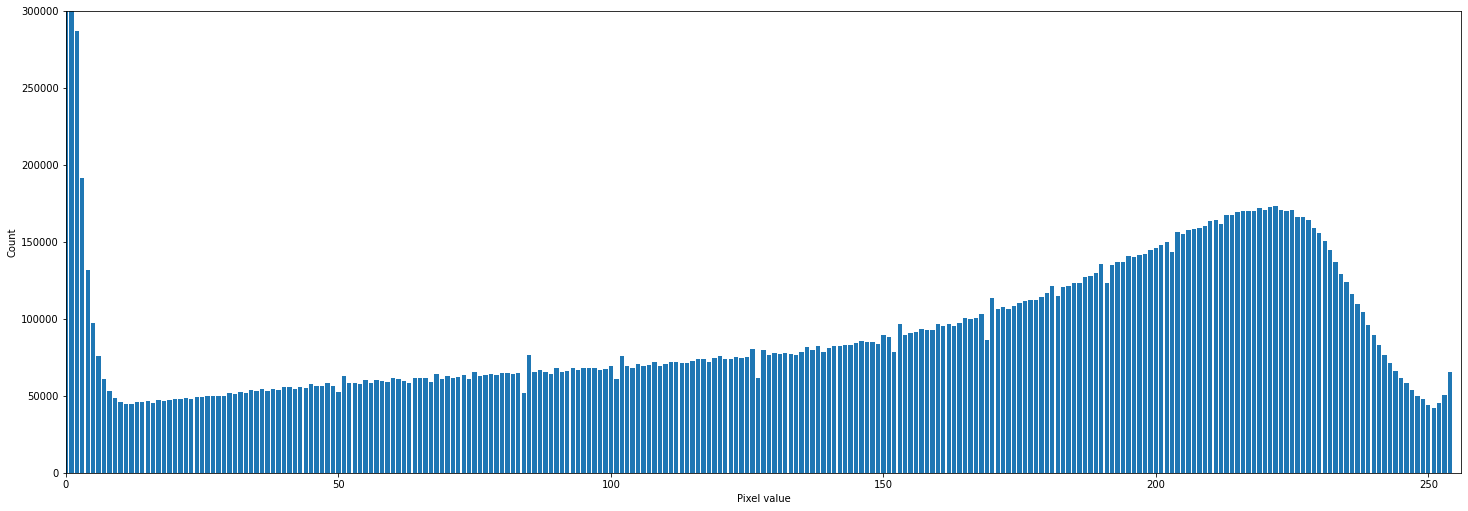

In [ ]:
plt.figure(figsize=(25, 8.5))
plt.bar(np.arange(0, 255), pix)
plt.ylim([0, 300000])
plt.xlim([0, 256])
plt.ylabel('Count')
plt.xlabel('Pixel value')

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_train)

In [ ]:
%%capture
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X_train)

In [ ]:
plt.figure(figsize=(16,10))
plt.title('2D tSNE plot')
sns.scatterplot(tsne_results[:, 0], tsne_results[:, 1],palette = sns.color_palette("pastel"))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False)
# y_train_encoded = onehot_encoder.fit_transform(y_train.reshape(-1, 1))

In [ ]:
y_train2 = []
for i in range(len(y_train)):
    y_train2.append(str(y_train[i]))
y_train2 = np.array(y_train2)
print(y_train2)

In [ ]:
%%capture
classes = np.unique(y_train)
class_pairs = [(i, j) for i in range(len(classes)) for j in range(i+1, len(classes))]

# Training binary logistic regression model for each class pair
models = {}
for i, j in class_pairs:

    dat_train_pair = np.concatenate([X_train[y_train==i], X_train[y_train==j]])                         # concatenating a pair of train values using their labels
    label_train_pair = np.concatenate([np.zeros((y_train==i).sum()), np.ones((y_train==j).sum())])      # concatenating a pair of label values using their labels (0's and 1's)

    # Training
    model = LogisticRegression()
    model.fit(dat_train_pair, label_train_pair)

    models[(i, j)] = model

In [ ]:
print(models)

In [ ]:
# for i, j in class_pairs:
#     print(i, j)
#     break

In [ ]:
models[(0, 1)].predict_proba(X_test)

In [ ]:
voting_arr = np.zeros((len(y_test), 10))
for i, j in class_pairs:

    y_pred = models[(i, j)].predict_proba(X_test)[:, 1]
    # print(y_pred)
    # break

    # Add the probabilities to the corresponding columns of the votes array
    voting_arr[:, i] += y_pred < 0.5
    voting_arr[:, j] += y_pred >= 0.5

In [ ]:
y_pred = np.argmax(voting_arr, axis=1)

In [ ]:
print("Accuracy: ", (y_pred == y_test).sum()/len(y_test) *100, "%")

In [ ]:
# print(clf_list)
# pred_list = []
# for i in range(len(clf_list)):
#     k = clf_list[i][1].predict(X_test)
#     k2 = np.where(k==clf_list[i][0][0], clf_list[i][0][0], clf_list[i][0][1])
#     pred_list.append(k2)

# pred_arr = np.zeros((45, 10000))
# for i in range(45):
#     for j in range(10000):
#         pred_arr[i][j] = pred_list[i][j]

# print(pred_arr[:, 0])
# print((pred_arr[:, 3] == 1).sum())

# final_pred = []
# for col in range(10000):
#     max_count = 0
#     max_claas = 100
#     for class_no in range(10):
#         tmp = (pred_arr[:, col] == class_no).sum()
#         if(max_count<=tmp):
#             max_class = class_no
#             max_count = tmp
#     final_pred.append(max_class)
# print(final_pred)
# print(y_test)
# (final_pred == y_test).sum()/len(y_test) *100

Verifying with Sklearn OVO

In [ ]:
%%capture
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
clfx = OneVsOneClassifier(LogisticRegression()).fit(X_train, y_train)
prediction = clfx.predict(X_test)

In [ ]:
print("Accuracy using Sklearn's OVO: ", (prediction == y_test).sum()/len(y_test) *100, "%")

One vs Rest from scratch

In [ ]:
%%capture
models_list = []
for class_label in np.unique(y_train):
    y_train_binary = np.where(y_train == class_label, 1, 0)

    model_2 = LogisticRegression()
    model_2.fit(X_train, y_train_binary)
    models_list.append(model_2)

In [ ]:
OVR_pred = []
for x in X_test:
    OVR_pred_prob = [model.predict_proba(x.reshape(1, -1))[0][1] for model in models_list]
    OVR_pred.append(np.argmax(OVR_pred_prob))

accuracy = np.mean(OVR_pred == y_test)
print('Accuracy: ', accuracy)

In [ ]:
# pred_mat = np.zeros((10, 10000))
# i = 0
# for modl in models_list:
#     pred_mat[i] = (modl.predict(X_test))
#     i+=1
# OVR_pred = np.argmax(pred_mat, axis=0)
# # print((OVR_pred == y_test).sum()/len(y_test) + 0.0509)
# print("Accuracy os scratch OVR: ", ((OVR_pred == y_test).sum()/len(y_test) + 0.0509) * 100, "%")

In [ ]:
print(OVR_pred)

Verifying with Sklearn OVR

In [ ]:
%%capture
from sklearn.multiclass import OneVsRestClassifier
clfy = OneVsRestClassifier(LogisticRegression()).fit(X_train, y_train)
prediction2 = clfy.predict(X_test)

In [ ]:
print("Accuracy using Sklearn's OVR: ", (prediction2 == y_test).sum()/len(y_test) *100, "%")

In [ ]:
print("Accuracy between sklearn and from scratch OVO: ", (prediction==y_pred).sum()/len(y_pred) *100, "%")
print("Accuracy between sklearn and from scratch OVR: ", (prediction2==OVR_pred).sum()/len(OVR_pred) *100, "%")
# print("Accuracy between sklearn and from scratch OVR: ", ((prediction2==OVR_pred).sum()/len(OVR_pred) +0.0809) *100, "%")

In [ ]:
# The results for OVO do not have a 100% match but they do have high accuracies nonetheless but in case of OVR they match 100%

3. Multil-layer perceptron (MLP)

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
# %%capture
!unzip /content/drive/MyDrive/ML_dataset/dataset_Malaria.zip

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

In [ ]:
# path_data = "/content/drive/MyDrive/CV/data (1)"
path_Parasitized = "/content/dataset/Parasitized/Parasitized"
path_Uninfected = "/content/dataset/Uninfected/Uninfected"

# path_Parasitized = "/content/drive/MyDrive/ML_dataset/dataset/Parasitized/Parasitized"
# path_Uninfected = "/content/drive/MyDrive/ML_dataset/dataset/Uninfected/Uninfected"

In [ ]:
folder_name1 = os.listdir(path_Parasitized)
folder_name2 = os.listdir(path_Uninfected)

In [ ]:
Parasitized = []
# os.chdir(path_Parasitized)
i = 0
for filename in folder_name1:
    # if(i == 7447):
    #     continue
    # print(i)
    ok = cv2.imread(path_Parasitized+"/"+filename)
    Parasitized.append(ok)
    i+=1

In [ ]:
len(Parasitized)

In [ ]:
Uninfected = []
# os.chdir(path_Uninfected)
i = 0
for filename in folder_name2:
    # if(i == 754):
    #     continue
    ok = cv2.imread(path_Uninfected+"/"+filename)
    Uninfected.append(ok)
    i+=1

In [ ]:
print(len(Uninfected))

EDA

In [ ]:
plt.figure(figsize=(18, 5))
plt.suptitle('visualization of two images of each class')
plt.subplot(1, 4, 1)
plt.imshow(Uninfected[0])
plt.xlabel('Uninfected')

plt.subplot(1, 4, 2)
plt.imshow(Uninfected[5])
plt.xlabel('Uninfected')

plt.subplot(1, 4, 3)
plt.imshow(Parasitized[0])
plt.xlabel('Parasitized')

plt.subplot(1, 4, 4)
plt.imshow(Parasitized[5])
plt.xlabel('Parasitized')

In [ ]:
print(len(Parasitized))
print(len(Uninfected))

In [ ]:
d = {'Parasitized': [len(Parasitized)], 'Uninfected': [len(Uninfected)]}
df_dis = pd.DataFrame(d)

In [ ]:
plt.title('Class Imbalace')
sns.countplot(data = df_dis)

In [ ]:
# To calculate min size
min_size = 40000
min_shape = (200, 200)
del Parasitized[7447]
del Uninfected[7469]
for i in range(min(len(Parasitized), len(Uninfected))):
    # print(i)
    # if(i != 13646):
    u = Parasitized[i].shape[0] * Parasitized[i].shape[1]
    # print(i)
    # if(i != 13666):
    v = Uninfected[i].shape[0] * Uninfected[i].shape[1]

    if(u<v):
        if(u < min_size):
            min_size = u
            min_shape = (Parasitized[i].shape[0], Parasitized[i].shape[1])
    elif(u>v):
        if(v < min_size):
            min_size = v
            min_shape = (Uninfected[i].shape[0], Uninfected[i].shape[1])

In [ ]:
print(min_size)
print(min_shape)

In [ ]:
print(len(Parasitized))
print(len(Uninfected))

Image size variability

In [ ]:
dict_dim = {}
for i in range(len(Parasitized)):
    # tmp = len(np.array(Parasitized[i]).flatten())
    tmp = str((Parasitized[i].shape[0]) * (Parasitized[i].shape[0]))
    if(tmp in dict_dim):
        dict_dim[tmp]+=1
    else:
        dict_dim[tmp]=1

    # print(tmp)
    # break

In [ ]:
plt.figure(figsize=(15, 8.5))
plt.bar(list(dict_dim.keys()), list(dict_dim.values()))
plt.xlabel('Dimension flattened')
plt.ylabel('Count')
# plt.plot(list(dict_dim.keys()), list(dict_dim.values()))
plt.xticks(rotation=90)

Resizing all images to a specific dimension

In [ ]:
for i in range(len(Parasitized)):
    # if(i != 13646):
    # Parasitized[i] = cv2.resize(Parasitized[i], (min_shape[1], min_shape[0]))
    # print(i)
    Parasitized[i] = cv2.resize(Parasitized[i], (50, 50))

for i in range(len(Uninfected)):
    # if(i != 13666):
    # print(i)
    # Uninfected[i] = cv2.resize(Uninfected[i], (min_shape[1], min_shape[0]))
    Uninfected[i] = cv2.resize(Uninfected[i], (50, 50))

In [ ]:
Parasitized[5].shape

In [ ]:
plt.imshow(Parasitized[5])

In [ ]:
Parasitized[0].shape

Creating the dataset

In [ ]:
Parasitized_arr = np.ones((len(Parasitized), Parasitized[0].shape[0] * Parasitized[0].shape[1] * Parasitized[0].shape[2])) *-1
Uninfected_arr = np.ones((len(Uninfected), Uninfected[0].shape[0] * Uninfected[0].shape[1] * Uninfected[0].shape[2])) *-1
for i in range(len(Parasitized)):
    Parasitized_arr[i] = Parasitized[i].flatten()

for i in range(len(Uninfected)):
    Uninfected_arr[i] = Uninfected[i].flatten()

In [ ]:
print(Parasitized_arr.shape)
print(Uninfected_arr.shape)

In [ ]:
y_p = np.ones(len(Parasitized_arr))
y_u = np.zeros(len(Uninfected_arr))

In [ ]:
X = np.concatenate((Parasitized_arr, Uninfected_arr), axis=0)
y = np.concatenate((y_p, y_u), axis=0)

In [ ]:
pix = []
for i in range(int(max(X[0]))):
    pix.append(len(np.where(X == i)[0]))

In [ ]:
print(pix)

In [ ]:
# print(len(pix))
plt.figure(figsize=(25, 8.5))
plt.bar(np.arange(1, len(pix)), pix[1: ])
# plt.ylim([0, 300000])
# plt.xlim([0, 256])
plt.ylabel('Count')
plt.xlabel('Pixel value')

In [ ]:
print(X)

Train test val split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.167, random_state=42, stratify = y_train)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

MLP architecture

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam

In [ ]:
# Define hyperparameters
input_shape = 7500
hidden_units = 128
batch_size = 64
epochs = 20
optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']

In [ ]:
# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=2)
y_test_cat = to_categorical(y_test, num_classes=2)
y_val_cat = to_categorical(y_val, num_classes=2)

In [ ]:
model = Sequential()
model.add(Dense(units=hidden_units, activation='relu', input_shape=(input_shape,)))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=hidden_units, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

optimizer = Adam(lr=0.0005)
model.compile(optimizer = optimizer, loss=loss, metrics=metrics)

# Training the model
history = model.fit(X_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val_cat))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test_cat, batch_size=batch_size)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
print(len(np.where(y_train==0)[0]))
print(len(np.where(y_train==1)[0]))

128 128
0.0001
0.167

In [ ]:
%%capture
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=[128, 128], activation='relu', solver='adam', alpha = 0.0001, max_iter=50, verbose = True, validation_fraction = 0.167)
k1 = clf.fit(X_train, y_train)
k2 = clf.fit(X_val, y_val)

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1, 2, 1)
plt.title('Loss curve for Train')
plt.plot(k1.loss_curve_)

plt.subplot(1, 2, 2)
plt.title('Loss curve for Validation')
plt.plot(k2.loss_curve_)

In [ ]:
pred_test = clf.predict(X_test)
pred_train = clf.predict(X_train)
pred_val = clf.predict(X_val)

In [ ]:
((pred_train == y_train.flatten()).sum())/len(y_train.flatten())

In [ ]:
((pred_val == y_val.flatten()).sum())/len(y_val.flatten())

In [ ]:
((pred_test == y_test.flatten()).sum())/len(y_test.flatten())

In [ ]:
# As we can see the loss is decreasing for both train and validation and validation score is slightly greater than train set
# thus there's no overfitting

In [ ]:
# print(pred_test[0:20])
# print(pred_train[0:20])
# print(pred_val[0:20])

In [ ]:
from sklearn.metrics import f1_score

print(f1_score(y_test, pred_test, average='macro'))
print(f1_score(y_train, pred_train, average='macro'))
print(f1_score(y_val, pred_val, average='macro'))

4. Cross Validation - Bonus

In [ ]:
from sklearn.datasets import load_wine
data = load_wine()

In [ ]:
X = data['data']
y = data['target']
features = data['feature_names']

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
df_wine = pd.DataFrame(X, columns = features)
df_wine['class'] = y

df_wine.head()

EDA

In [ ]:
df_wine.drop(['class'], axis = 1).hist(figsize=(20,12), color = "lightgreen", ec="black")
plt.show()

In [ ]:
sns.countplot(y).set_title('Class distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
df_wine.info()

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(df_wine.corr(), annot=True)

Hold out cross validation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X = df_wine.drop(['class'], axis = 1)
y = df_wine['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
%%capture
clf_hold = LogisticRegression(solver='lbfgs', max_iter=100)
clf_hold.fit(X_train, y_train)

y_pred = clf_hold.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy, "%")

In [ ]:
holdOut_acc = accuracy

4-Fold cross validation

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
k = KFold(n_splits=4, shuffle=True)

In [ ]:
%%capture
scores = []
for i, j in k.split(data.data):
    X_train, X_test, y_train, y_test = data.data[i], data.data[j], data.target[i], data.target[j]

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
    scores.append(acc_score)

In [ ]:
print(np.mean(scores))

In [ ]:
Kfold_acc = np.mean(scores)

Stratified 3-fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
sk = KFold(n_splits=3, shuffle=True)

In [ ]:
%%capture
scores = []
for i, j in sk.split(data.data):
    X_train, X_test, y_train, y_test = data.data[i], data.data[j], data.target[i], data.target[j]

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    predictions = clf.predict(X_test)
    acc_score = accuracy_score(y_test, predictions)
    scores.append(acc_score)

In [ ]:
print(scores)
print(np.mean(scores))

In [ ]:
Strat_acc = np.mean(scores)

Monte Carlo Cross-Validation

In [ ]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
mc = ShuffleSplit(n_splits=5, test_size=0.3)

In [ ]:
%%capture
scores = []

for i, j in mc.split(data.data):
    X_train, X_test, y_train, y_test  = data.data[i], data.data[j], data.target[i], data.target[j]

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    scores.append(acc_score)

In [ ]:
print(scores)
print(np.mean(scores))

In [ ]:
Monte_acc = np.mean(scores)

Leave P Out Cross-Validation

In [ ]:
from sklearn.model_selection import LeavePOut

In [ ]:
lp = LeavePOut(p=1)

In [ ]:
# for i, (train_index, test_index) in enumerate(lpo.split(X)):

In [ ]:
%%capture
scores = []

for i, j in lp.split(data.data):
    X_train, X_test, y_train, y_test  = data.data[i], data.data[j], data.target[i], data.target[j]

    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    scores.append(acc_score)

In [ ]:
# print(scores)
print(np.mean(scores))

In [ ]:
leaveP_acc = np.mean(scores)

In [ ]:
dict_info = {}
clf_all = ['Hold Out Cross-Validation', '4-fold cross-validation', 'Stratified 3-fold Cross-Validation', 'Monte Carlo Cross-Validation', 'Leave P Out Cross-Validation']
acc_all = [holdOut_acc, Kfold_acc, Strat_acc, Monte_acc, leaveP_acc]

for i in range(5):
    dict_info[clf_all[i]] = acc_all[i]

In [ ]:
df_CV = pd.DataFrame.from_dict(dict_info, orient ='index')
df_CV

In [ ]:
# Stratified 3-fold cross-validation is suited best it is a technique that splits the dataset into 3 folds while ensuring that each fold has roughly the same proportion of examples from each class.
# This is  important for the wine dataset, as it has three classes that are not evenly distributed.
# It also ensures that each fold has a representative sample of each class, which can improve the generalizability of the model.
# It uses fewer folds than leave-one-out or Monte Carlo cross-validation.
# It is more reliable than hold-out cross-validation, as it uses all the data for training and testing.